In [1]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split
import shutil
import numpy as np

### load the dataset

In [2]:
df = pd.read_csv('/kaggle/input/self-driving-cars/labels_trainval.csv')

In [3]:
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
0,1478019952686311006.jpg,237,251,143,155,1
1,1478019952686311006.jpg,437,454,120,186,3
2,1478019953180167674.jpg,218,231,146,158,1
3,1478019953689774621.jpg,171,182,141,154,2
4,1478019953689774621.jpg,179,191,144,155,1


In [4]:
class_dic = {1:'car', 2:'truck', 3:'pedestrain', 4:'bicyclist', 5:'light'}

In [5]:
df['class_name'] = df['class_id'].replace(class_dic)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id,class_name
0,1478019952686311006.jpg,237,251,143,155,1,car
1,1478019952686311006.jpg,437,454,120,186,3,pedestrain
2,1478019953180167674.jpg,218,231,146,158,1,car
3,1478019953689774621.jpg,171,182,141,154,2,truck
4,1478019953689774621.jpg,179,191,144,155,1,car


In [6]:
df['class_id']=df['class_id']-1

In [7]:
df.head()

,frame,xmin,xmax,ymin,ymax,class_id,class_name
0,1478019952686311006.jpg,237,251,143,155,0,car
1,1478019952686311006.jpg,437,454,120,186,2,pedestrain
2,1478019953180167674.jpg,218,231,146,158,0,car
3,1478019953689774621.jpg,171,182,141,154,1,truck
4,1478019953689774621.jpg,179,191,144,155,0,car


### visualize the distribution of the classes

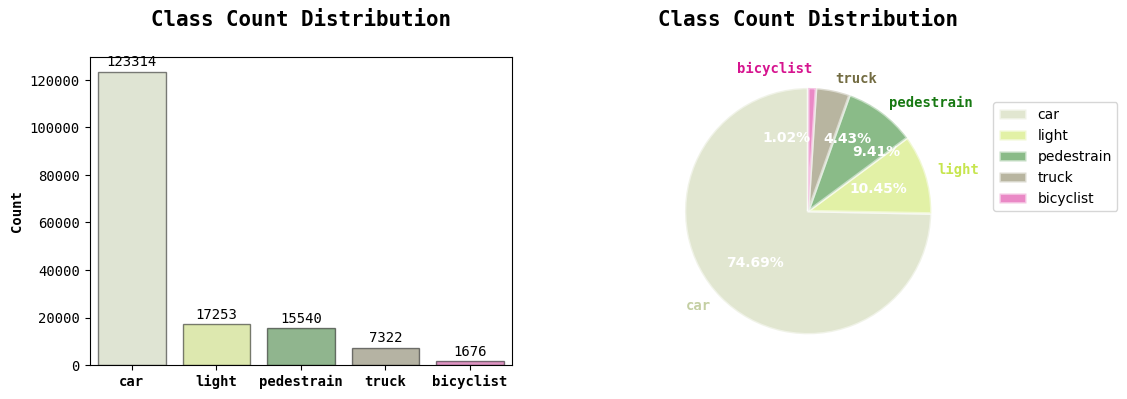

In [8]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(5)]
sns.barplot(data=df['class_name'].value_counts().reset_index(), y='class_name', x='index', palette=colors, alpha=0.5, ax=axes[0], edgecolor='black')
for i in axes[0].containers:
    axes[0].bar_label(i, font='monospace', padding=2)
axes[0].set_xlabel('')
axes[0].set_ylabel('Count', font='monospace', weight='semibold')
for x in axes[0].get_xticklabels():
    x.set_font('monospace')
    x.set_fontweight('semibold')
for y in axes[0].get_yticklabels():
    y.set_font('monospace')
axes[0].set_title('Class Count Distribution\n',font='monospace', weight='semibold',size=15)
    
patches, texts, pcts = axes[1].pie(df['class_name'].value_counts().reset_index()['class_name'],
                                   labels=df['class_name'].value_counts().reset_index()['index'],colors=colors, 
                                   wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
                                   textprops={'size': 'x-large'}, startangle=90, autopct='%1.2f%%',);
for i, patch in enumerate(patches):
    texts[i].set_color(patch.get_facecolor())
    patch.set_alpha(0.5)
for j in pcts:
    j.set_size(10)
    j.set_color('white')
    j.set_weight('semibold')
plt.setp(texts, fontweight='semibold', font='monospace')
axes[1].legend(loc=[1.1,0.5])
texts[-1].set_va('bottom')
texts[-1].set_ha('right')
pcts[-1].set_va('center')
pcts[-1].set_ha('right')
pcts[-2].set_ha('left')
pcts[-3].set_ha('left')
axes[1].set_title('Class Count Distribution\n',font='monospace', weight='semibold',size=15);

### see some images

In [9]:
df['frame'].value_counts().reset_index()['frame'].unique() 

array([31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [10]:
df['frame'].value_counts()[df['frame'].value_counts()==8].index[0]

'1479502363236699398.jpg'

In [11]:
sample_img = df[df['frame']=='1478898320598729971.jpg'] # this image has three lights, three cars, and two bicyclists. 

In [12]:
sample_img['class_name'].value_counts()

car          3
light        3
bicyclist    2
Name: class_name, dtype: int64

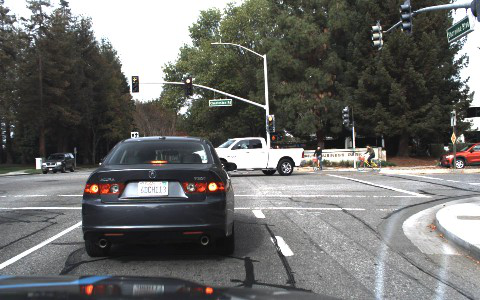

In [13]:
Image.open('/kaggle/input/self-driving-cars/images/1478898320598729971.jpg')

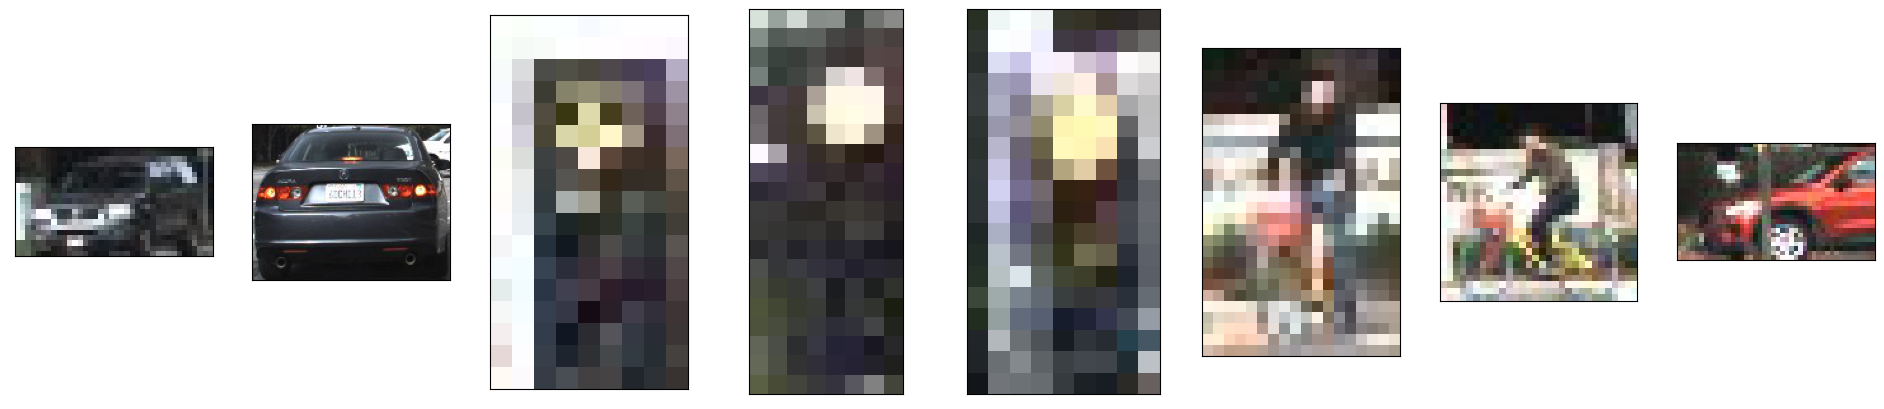

In [14]:
# let's take a look at them
imgs = []
img = Image.open('/kaggle/input/self-driving-cars/images/1478898320598729971.jpg')
for index, row in sample_img.iterrows():
    xmin = row['xmin']
    xmax = row['xmax']
    ymin = row['ymin']
    ymax = row['ymax']
    imgs.append(np.array(img)[ymin:ymax, xmin:xmax:, :])
    
fig, axes = plt.subplots(1,8, figsize=(24,5), subplot_kw=dict(xticks=[], yticks=[]))
for i ,ax in enumerate(axes.flat):
    ax.imshow(imgs[i])

### create the train, val, test set

In [15]:
base_dir = os.path.join('self_driving_cars')
train_dir = os.path.join(base_dir, 'train')
train_imgs_dir = os.path.join(train_dir, 'images')
train_labels_dir = os.path.join(train_dir, 'labels')

validation_dir = os.path.join(base_dir, 'validation')
validation_imgs_dir = os.path.join(validation_dir, 'images')
validation_labels_dir = os.path.join(validation_dir, 'labels')

test_dir = os.path.join(base_dir, 'test')
test_imgs_dir = os.path.join(test_dir, 'images')
test_labels_dir = os.path.join(test_dir, 'labels')

In [16]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [17]:
create_dir(base_dir)

create_dir(train_dir)
create_dir(train_imgs_dir)
create_dir(train_labels_dir)

create_dir(validation_dir)
create_dir(validation_imgs_dir)
create_dir(validation_labels_dir)

create_dir(test_dir)
create_dir(test_imgs_dir)
create_dir(test_labels_dir)

In [18]:
all_imgs = os.listdir('/kaggle/input/self-driving-cars/images')
samples = random.sample(all_imgs, 1000)
print(f'There are totally {len(all_imgs)} images\n')
print(f'We will use only {len(samples)} images')

There are totally 22241 images

We will use only 1000 images


In [19]:
dir_ = defaultdict(int)
for i in samples:
    sample_df = df[df['frame']==i]
    for index, row in sample_df.iterrows():
        if row['class_name']=='car':
            dir_['car']+=1
        elif row['class_name']=='truck':
            dir_['truck']+=1
        elif row['class_name']=='pedestrain':
            dir_['pedestrain']+=1
        elif row['class_name']=='bicyclist':
            dir_['bicyclist']+=1
        else:
            dir_['light']+=1

In [20]:
sample_class_count = pd.DataFrame(dir_.items())

In [21]:
sample_class_count.columns=['class', 'count']

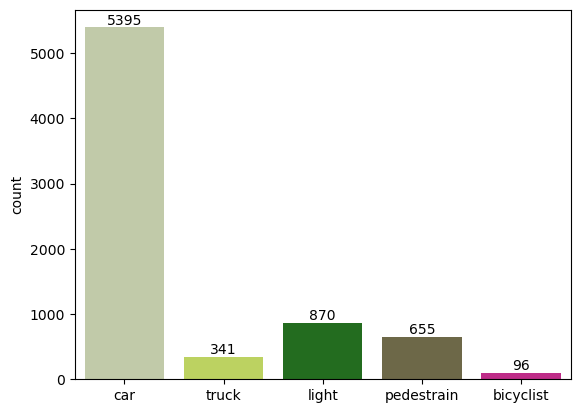

In [22]:
sns.barplot(data=sample_class_count, x='class', y='count', palette=colors)
ax=plt.gca()
for i in ax.containers:
    plt.bar_label(i)
plt.xlabel('');

### train, val, test split

In [23]:
Train, ValTest = train_test_split(samples, test_size=0.25, shuffle=True)

In [24]:
Val, Test = train_test_split(ValTest, test_size=0.3, shuffle=True)

In [25]:
print(f'There are {len(Train)} images in the train set\n')
print(f'There are {len(Val)} images in the validation set\n')
print(f'There are {len(Test)} images in the test set')

There are 750 images in the train set

There are 175 images in the validation set

There are 75 images in the test set


### distribute the images

In [26]:
def copy_images(source_path, destination_path, data):
    for i in data:
        shutil.copy(os.path.join(source_path, i), os.path.join(destination_path, i))    

In [27]:
all_imgs_path = '/kaggle/input/self-driving-cars/images'

In [28]:
copy_images(all_imgs_path, train_imgs_dir, Train)
copy_images(all_imgs_path, validation_imgs_dir, Val)
copy_images(all_imgs_path, test_imgs_dir, Test)

In [29]:
print(f'There are {len(os.listdir(train_imgs_dir))} images in the train set\n')
print(f'There are {len(os.listdir(validation_imgs_dir))} images in the validation set\n')
print(f'There are {len(os.listdir(test_imgs_dir))} images in the test set')

There are 750 images in the train set

There are 175 images in the validation set

There are 75 images in the test set


In [30]:
df.dtypes

frame         object
xmin           int64
xmax           int64
ymin           int64
ymax           int64
class_id       int64
class_name    object
dtype: object

In [31]:
for index, row in df.iterrows():
    df['height'] = Image.open(os.path.join(all_imgs_path, row['frame'])).height
    df['width'] = Image.open(os.path.join(all_imgs_path, row['frame'])).width

In [32]:
df['x_center'] = (df['xmin']+df['xmax'])/(2*df['width'])
df['y_center'] = (df['ymin']+df['ymax'])/(2*df['height'])
df['box_width'] = (df['xmax']-df['xmin'])/df['width']
df['box_height'] = (df['ymax']-df['ymin'])/df['height']

In [33]:
df=df.astype(str)

In [34]:
df.head()

,frame,xmin,xmax,ymin,ymax,class_id,class_name,height,width,x_center,y_center,box_width,box_height
0,1478019952686311006.jpg,237,251,143,155,0,car,300,480,0.5083333333333333,0.49666666666666665,0.029166666666666667,0.04
1,1478019952686311006.jpg,437,454,120,186,2,pedestrain,300,480,0.928125,0.51,0.035416666666666666,0.22
2,1478019953180167674.jpg,218,231,146,158,0,car,300,480,0.46770833333333334,0.5066666666666667,0.027083333333333334,0.04
3,1478019953689774621.jpg,171,182,141,154,1,truck,300,480,0.36770833333333336,0.49166666666666664,0.022916666666666665,0.043333333333333335
4,1478019953689774621.jpg,179,191,144,155,0,car,300,480,0.3854166666666667,0.49833333333333335,0.025,0.03666666666666667


In [35]:
def copy_label(label_list, destination_path):
    for filename in label_list:  
        data = df[df['frame']==filename]
        list_=[]
        for index, r in data.iterrows():
            list_.append(r['class_id']+' '+r['x_center']+' '+r['y_center']+' '+r['box_width']+' '+r['box_height'])
            text = '\n'.join(list_)
            with open(os.path.join(destination_path, filename[:-4]+'.txt'), 'w') as file:
                file.write(text)

In [36]:
copy_label(Train, train_labels_dir)
copy_label(Val, validation_labels_dir)
copy_label(Test, test_labels_dir)

In [37]:
print(f'There are {len(os.listdir(train_labels_dir))} labels in the train set\n')
print(f'There are {len(os.listdir(validation_labels_dir))} labels in the validation set\n')
print(f'There are {len(os.listdir(test_labels_dir))} labels in the test set')

There are 750 labels in the train set

There are 175 labels in the validation set

There are 75 labels in the test set


### just for verification

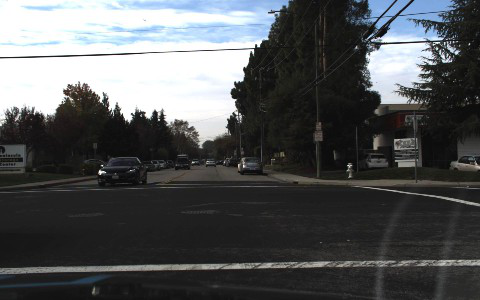

In [38]:
Image.open(os.path.join(train_imgs_dir, os.listdir(train_labels_dir)[23][:-4]+'.jpg'))

In [39]:
df[df['frame']==os.listdir(train_labels_dir)[23][:-4]+'.jpg']

,frame,xmin,xmax,ymin,ymax,class_id,class_name,height,width,x_center,y_center,box_width,box_height
42285,1478897292848108047.jpg,72,107,153,168,0,car,300,480,0.18645833333333334,0.535,0.07291666666666667,0.05
42286,1478897292848108047.jpg,80,111,155,169,0,car,300,480,0.19895833333333332,0.54,0.06458333333333334,0.04666666666666667
42287,1478897292848108047.jpg,94,151,151,190,0,car,300,480,0.2552083333333333,0.5683333333333334,0.11875,0.13
42288,1478897292848108047.jpg,143,158,157,172,0,car,300,480,0.31354166666666666,0.5483333333333333,0.03125,0.05
42289,1478897292848108047.jpg,170,193,153,172,0,car,300,480,0.378125,0.5416666666666666,0.04791666666666667,0.06333333333333334
42290,1478897292848108047.jpg,201,218,155,170,0,car,300,480,0.43645833333333334,0.5416666666666666,0.035416666666666666,0.05
42291,1478897292848108047.jpg,233,264,154,176,0,car,300,480,0.5177083333333333,0.55,0.06458333333333334,0.07333333333333333
42292,1478897292848108047.jpg,360,391,149,172,0,car,300,480,0.7822916666666667,0.535,0.06458333333333334,0.07666666666666666
42293,1478897292848108047.jpg,446,479,150,178,0,car,300,480,0.9635416666666666,0.5466666666666666,0.06875,0.09333333333333334


In [40]:
with open(os.path.join(train_labels_dir, os.listdir(train_labels_dir)[23]), 'r') as file:
    print(file.read())

0 0.18645833333333334 0.535 0.07291666666666667 0.05
0 0.19895833333333332 0.54 0.06458333333333334 0.04666666666666667
0 0.2552083333333333 0.5683333333333334 0.11875 0.13
0 0.31354166666666666 0.5483333333333333 0.03125 0.05
0 0.378125 0.5416666666666666 0.04791666666666667 0.06333333333333334
0 0.43645833333333334 0.5416666666666666 0.035416666666666666 0.05
0 0.5177083333333333 0.55 0.06458333333333334 0.07333333333333333
0 0.7822916666666667 0.535 0.06458333333333334 0.07666666666666666
0 0.9635416666666666 0.5466666666666666 0.06875 0.09333333333333334


### build the yaml file'

In [41]:
yaml_file = """names: 
- car
- truck
- pedestrain
- bicyclist
- light
nc: 5
test: /kaggle/working/self_driving_cars/test/images
train: /kaggle/working/self_driving_cars/train/images
val: /kaggle/working/self_driving_cars/validation/images
"""

with open('self_driving_cars/data.yaml', 'w') as f:
    f.write(yaml_file)

### run the yolov8 model

In [42]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.4/303.4 kB 526.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60
Note: you may need to restart the kernel to use updated packages.


In [43]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output
! yolo checks

Ultralytics YOLOv8.0.48 🚀 Python-3.7.12 torch-1.13.0+cpu CPU
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 4437.1/8062.4 GB disk)


In [44]:
! yolo task=detect mode=train model=yolov8x.pt data=/kaggle/working/self_driving_cars/data.yaml epochs=7 imgsz=640

100%|████████████████████████████████████████| 131M/131M [00:07<00:00, 18.9MB/s]
Ultralytics YOLOv8.0.48 🚀 Python-3.7.12 torch-1.13.0+cpu CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/self_driving_cars/data.yaml, epochs=7, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=

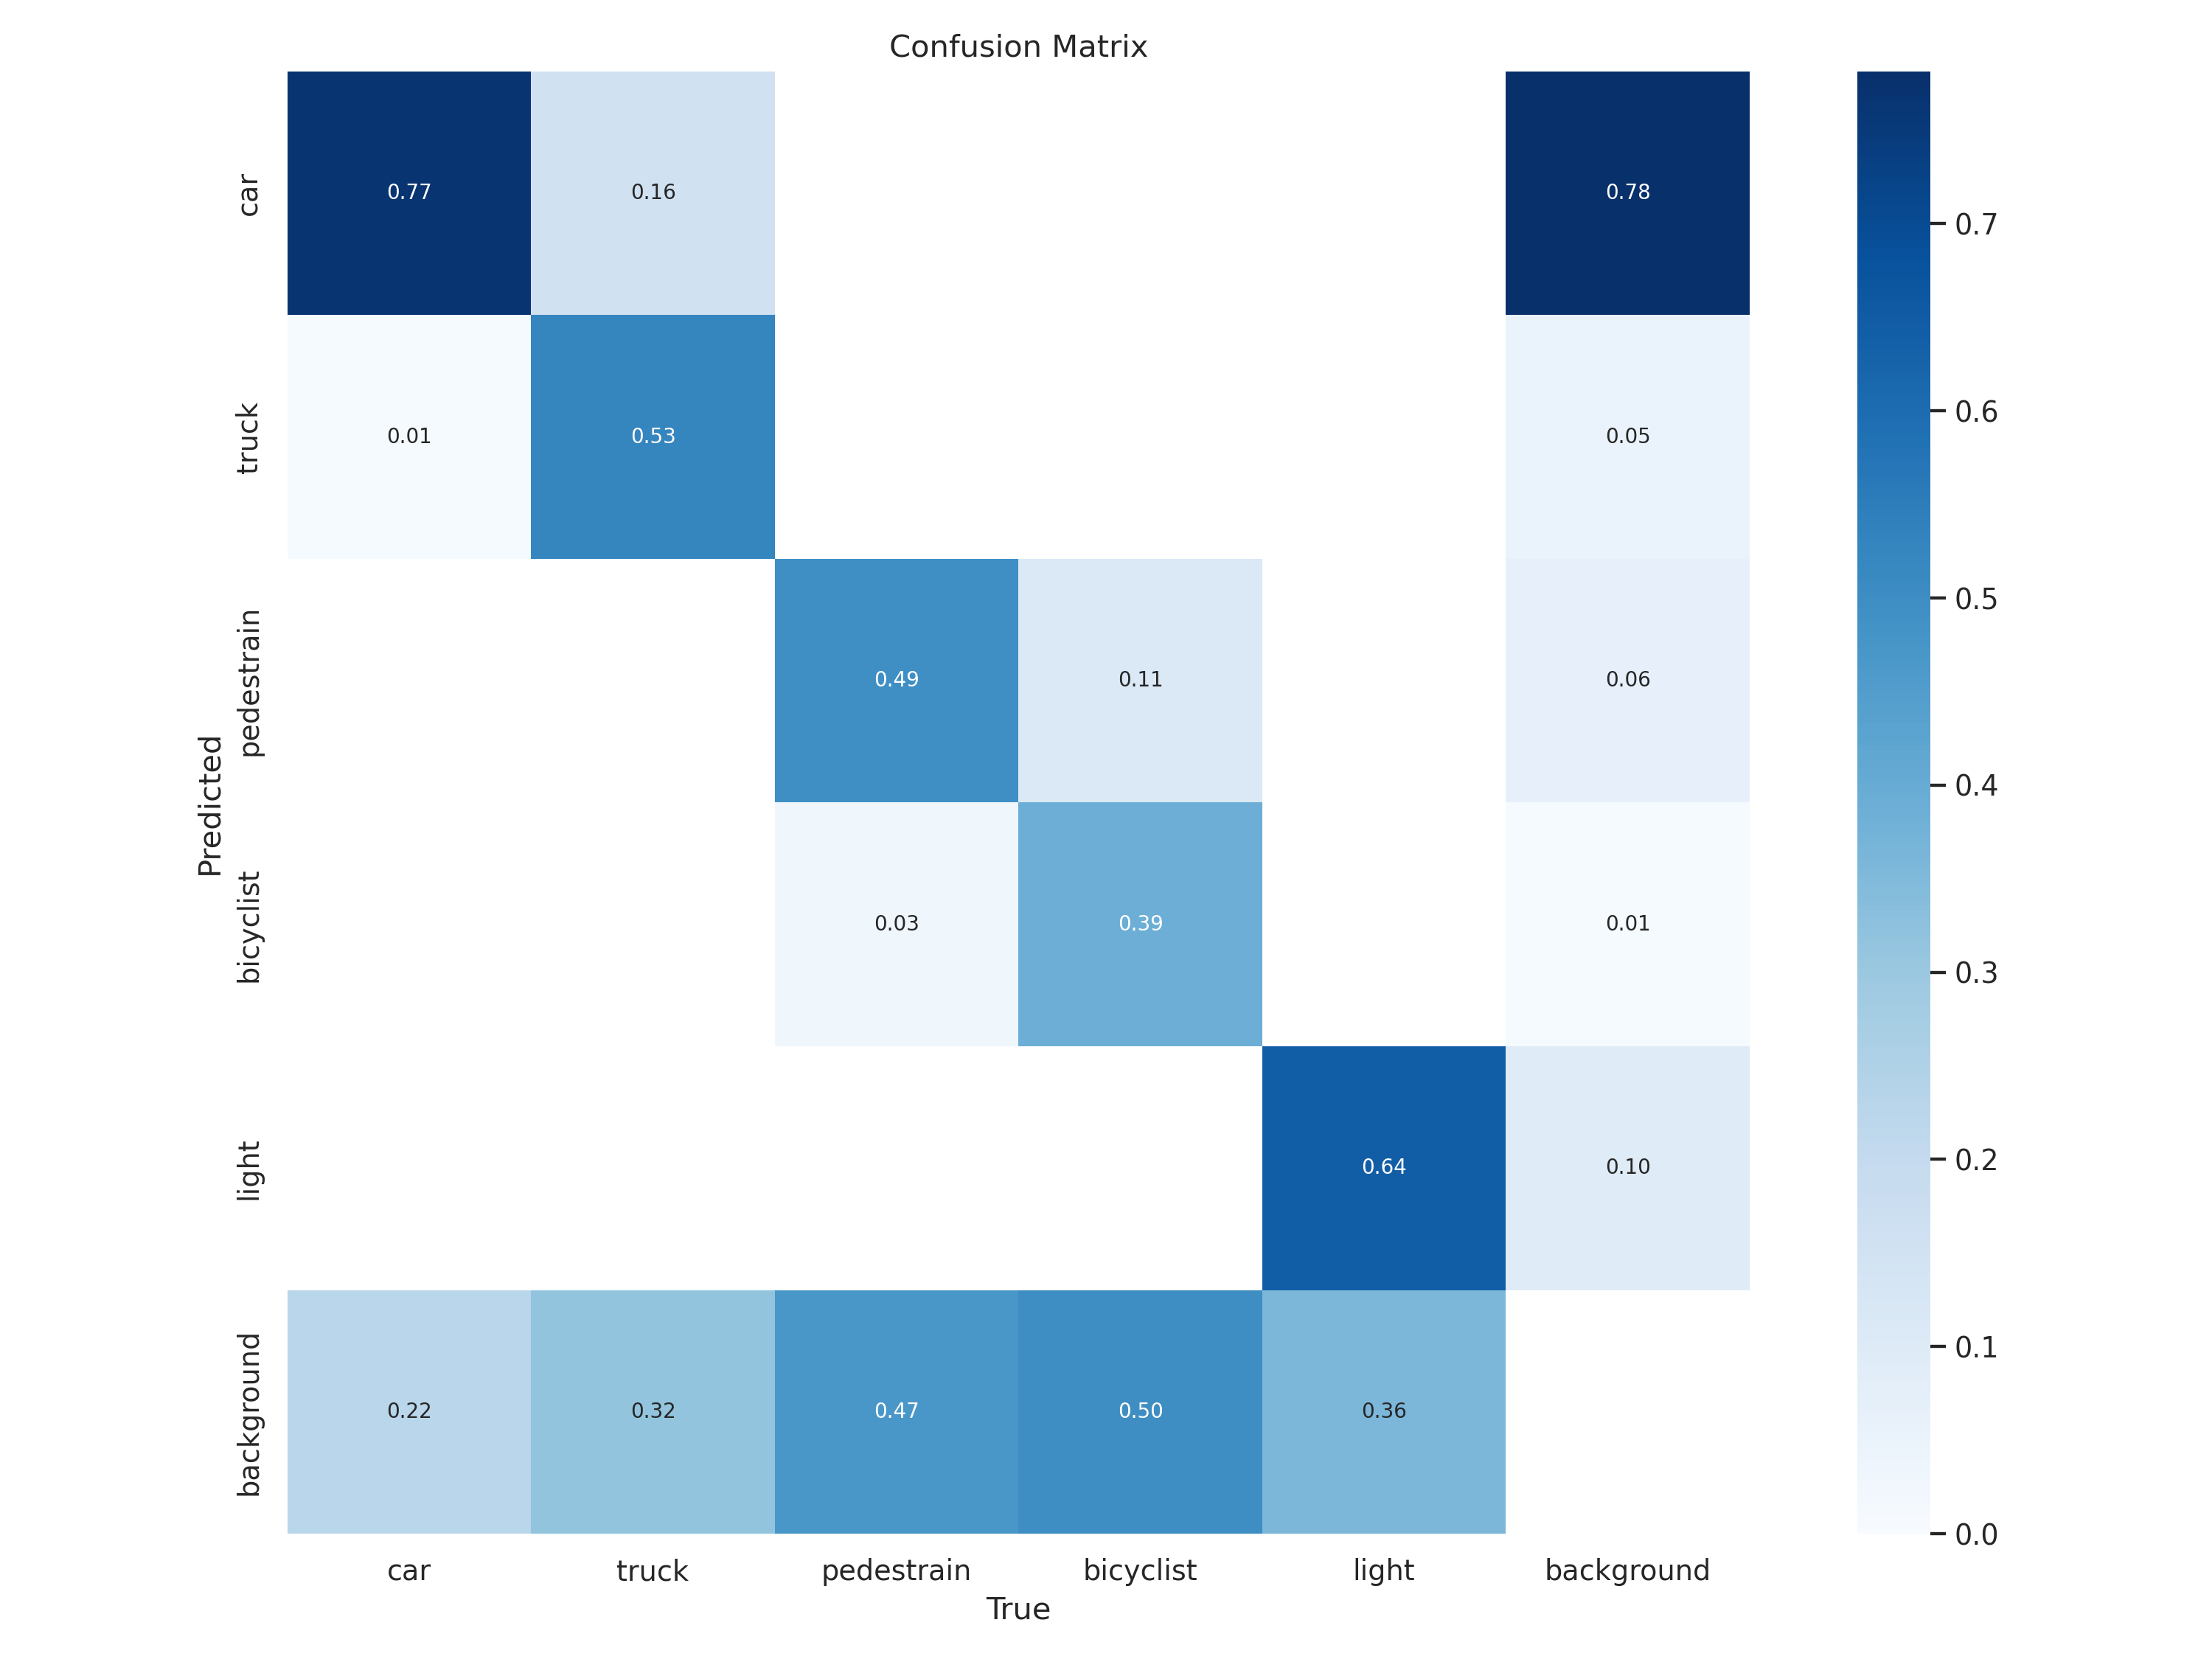

In [45]:
Image(filename = '/kaggle/working/runs/detect/train/confusion_matrix.png')